In [1]:
# prompt: mount at drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Setup LLm

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

devide = "cuda"
llm_model_name = "microsoft/Phi-3.5-mini-instruct"
llm_model = AutoModelForCausalLM.from_pretrained(
    llm_model_name,
    torch_dtype=torch.bfloat16,
    device_map = devide,
    trust_remote_code=True
)
tokenizer = AutoTokenizer.from_pretrained(llm_model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Setup Text to Image

In [4]:
from diffusers import DiffusionPipeline

sd_model_name = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
    sd_model_name,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant = "fp16"
).to(devide)

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Crawl news to arr

In [24]:
import requests
from bs4 import BeautifulSoup

url = "https://nhandan.vn/tin-moi.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
div = soup.find("div", {"class" : "main-content content-list"})
news = div.find_all("article", {"class" : "story"})
news_arr = []
for item in news[:3]:
  title = item.find("h3", {"class": "story__heading"}).find("a", {"class" : "cms-link"}).text.strip()
  summary = item.find("div", {"class" : "story__summary"}).text.strip()
  news_arr.append(title + '\n' + summary)


In [25]:
news_arr

['Thủ tướng Phạm Minh Chính thị sát Khu liên hợp gang thép Hòa Phát Dung Quất\nTối 9/2, trong chương trình công tác tại tỉnh Quảng Ngãi, Thủ tướng Phạm Minh Chính\xa0đã tới thăm, làm việc tại Khu liên hợp gang thép Hòa Phát Dung Quất.',
 'Hỗ trợ xóa hơn 100.000 nhà tạm, nhà dột nát\nTới nay, cả nước đã hỗ trợ xóa nhà tạm, nhà dột nát\xa0được hơn 100.000 căn.\xa0Một số địa phương đặt mục tiêu hoàn thành công tác này sớm hơn yêu cầu.',
 'Văn Quyết thăng hoa, Hà Nội FC áp đảo Sông Lam Nghệ An\nTối 9/2, đội trưởng Văn Quyết tỏa sáng với cú đúp và góp công lớn trong chiến thắng 3-0 của Hà Nội FC trước Sông Lam Nghệ An tại vòng 12 V-League\xa02024/25. Trận đấu cũng đánh dấu ngày đội bóng thủ đô trở lại sân Hàng Đẫy đầy ấn tượng.']

Generate prompt

In [41]:
news_prompt = []
for item in news_arr:
  prompt = "Write a short prompt in English that starts with 'Create an illustration' and not includes Vietnamese, to generate an image of " + item
  messages = [
      {"role": "system", "content": "You are a helpful assistant."},
      {"role": "user", "content": prompt}
  ]
  text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
  model_inputs = tokenizer([text], return_tensors="pt").to(devide)
  generated_ids = llm_model.generate(model_inputs.input_ids, max_new_tokens = 200, do_sample = True, eos_token_id = tokenizer.eos_token_id)
  generated_ids = [
      output_ids[len(input_ids) :] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
  ]
  response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
  news_prompt.append(response[0])

In [42]:
news_prompt

["Create an illustration depicting Thủ tướng Phạm Minh Chính actively participating in a consultation session at the steel alliance construction site of Hòa Phát Dung Quất on September 9th. The setting should capture early evening (tối 9/2) in Quảng Ngãi province, emphasizing the collaborative atmosphere and the intricate work at the site. Highlight the dedication and vision of Thủ tướng Chính for the project's success. Create an engaging and dynamic illustration that portrays Thủ tướng Phạm Minh Chính surrounded by a team of workers and engineers at the bustling site of Hòa Phát Dung Quất's steel alliance construction. The image is set during the serene dusk on September 9th, bringing out the sense of product",
 'Create an illustration depicting a community effort, with over 100,000 homes cleared of flood damage. Show diverse groups of people, from local to international volunteers, utilizing tools and equipment, working tirelessly together. Capture the resilience and solidarity of th

Gen Image

In [46]:
images_list = []
for prompt in news_prompt:
  image = pipe(prompt).images[0]
  images_list.append(image)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["�ng ngãi province, emphasizing the collaborative atmosphere and the intricate work at the site. highlight the dedication and vision of thủ tướng chính for the project's success. create an engaging and dynamic illustration that portrays thủ tướng phạm minh chính surrounded by a team of workers and engineers at the bustling site of hòa phát dung quất's steel alliance construction. the image is set during the serene dusk on september 9 th, bringing out the sense of product"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["�ng ngãi province, emphasizing the collaborative atmosphere and the intricate work at the site. highlight the dedication and vision of thủ tướng chính for the project's success. create an engaging and dynamic illustration that portrays thủ tướng phạm minh chính surrounded by a team of workers and engineers at th

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['renovation. create an illustration portraying a vibrant scene of unity and recovery after a catastrophic flood, highlighting the remarkable effort of over 1 0 0, 0 0 0 homes being restored. feature a kaleidoscope of individuals, including community members, aid workers, and volunteers, ranging from neighbors helping neighbors to international aid groups contributing resources. scenes of diverse groups collaborating with shovels, construction tools, and machinery should be juxt']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['renovation. create an illustration portraying a vibrant scene of unity and recovery after a catastrophic flood, highlighting the remarkable effort of over 1 0 0, 0 0 0 homes being restored. feature a kaleidoscope of individuals, including community members, aid workers, and volunteers, ranging from neighb

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["0 2 4 / 2 5 v - league season. the scene vividly captures văn quyết in a moment of celebration, a football in hand with the team's emblematic logo, evoking the team's spirit and the crowd's roaring support. the atmospheric background includes vibrant city lights, the iconic hàng đẫy stadium, and expressive fans, crafting an emblematic moment in ngoại trận của thế giới bóng"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["0 2 4 / 2 5 v - league season. the scene vividly captures văn quyết in a moment of celebration, a football in hand with the team's emblematic logo, evoking the team's spirit and the crowd's roaring support. the atmospheric background includes vibrant city lights, the iconic hàng đẫy stadium, and expressive fans, crafting an emblematic moment in ngoại trận của thế giới bóng"]


  0%|          | 0/50 [00:00<?, ?it/s]

In [47]:
images_list

[<PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>]

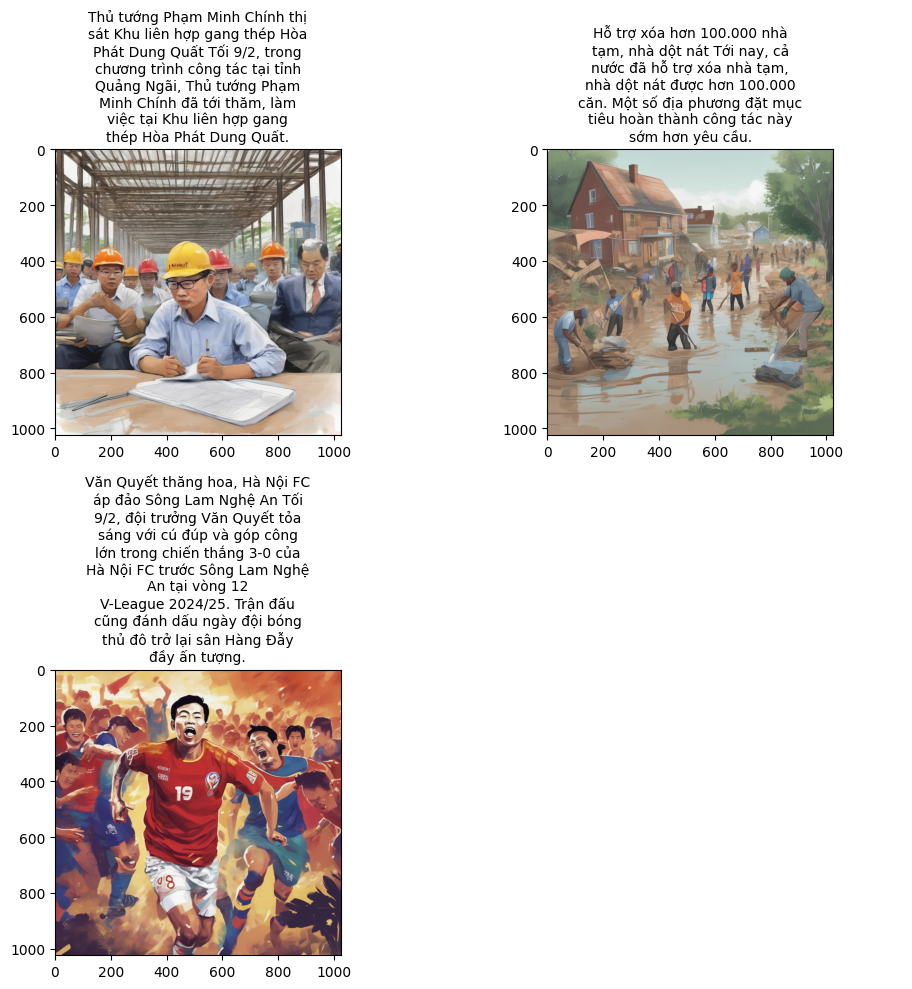

In [51]:
import matplotlib.pyplot as plt
import textwrap

assert len(images_list) == len(news_arr)
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
def wrap_text(text, width=30):
    return "\n".join(textwrap.wrap(text, width))
for i, ax in enumerate(axs.flat):
    if i < len(images_list):
        ax.imshow(images_list[i])
        ax.set_title(wrap_text(news_arr[i]), fontsize=10)
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()